# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica
2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)
15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: IPC - indicador mensual (numérico)
18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)
19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)
20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - y - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



## 1. Importación de paquetes y dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
dftest = pd.read_csv("data/credit-test.csv")
dftrain = pd.read_csv("data/credit-train.csv")

## 2.EDA y Visual EDA

In [3]:
dftrain.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
dftest.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


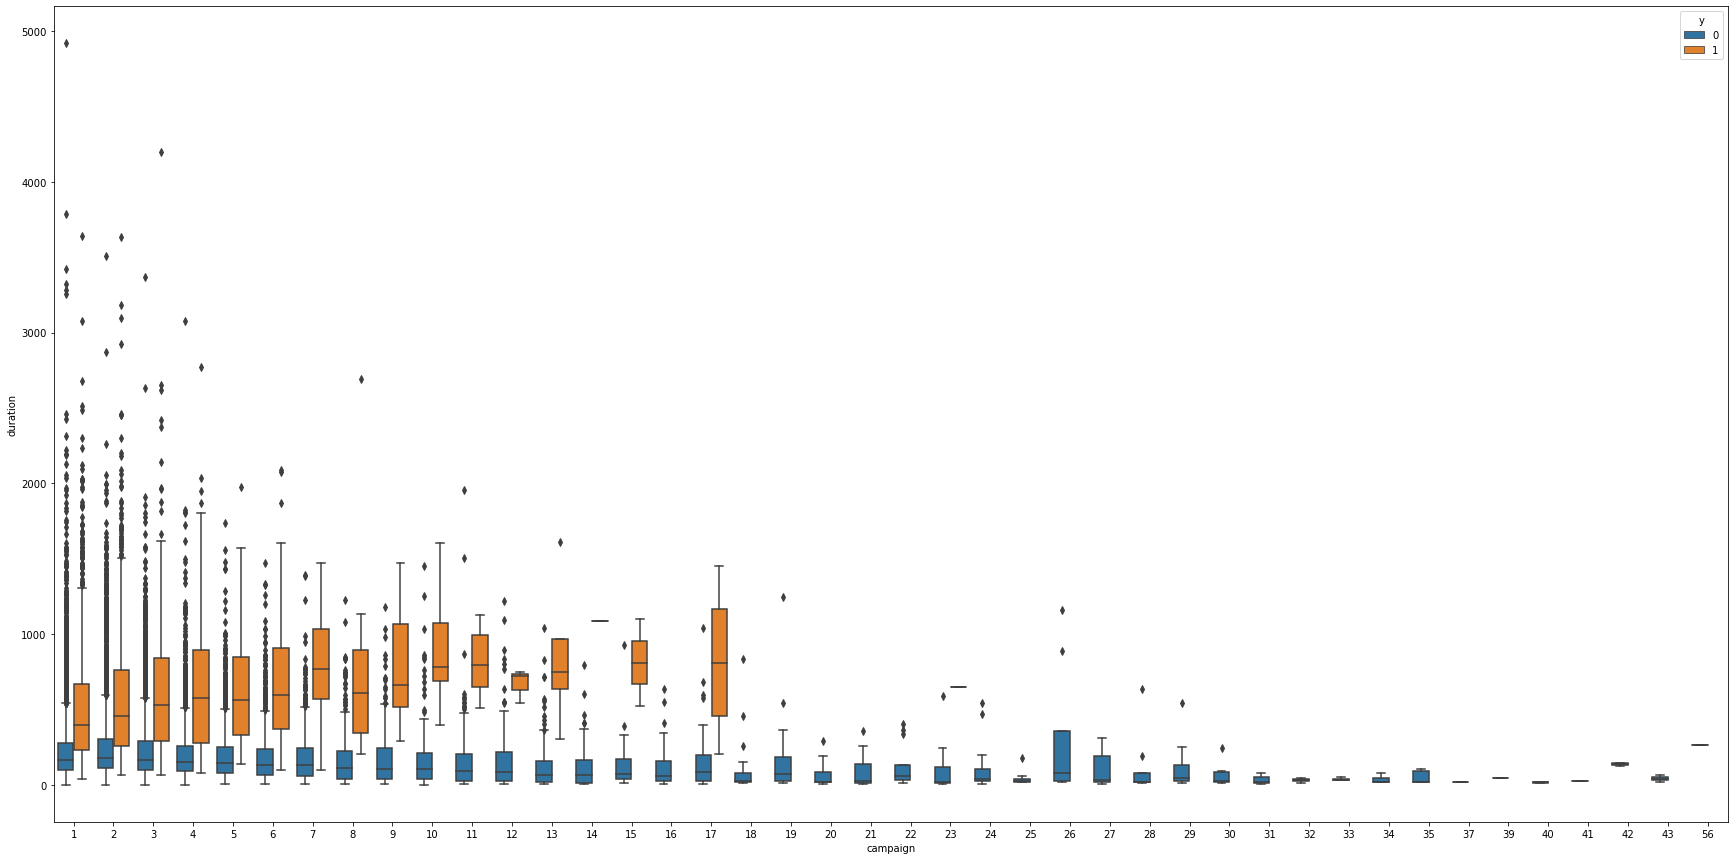

In [6]:
plt.figure(figsize=(30,15))
bp = sns.boxplot(x="campaign", y="duration",hue="y", data=dftrain)

<AxesSubplot:xlabel='duration', ylabel='count'>

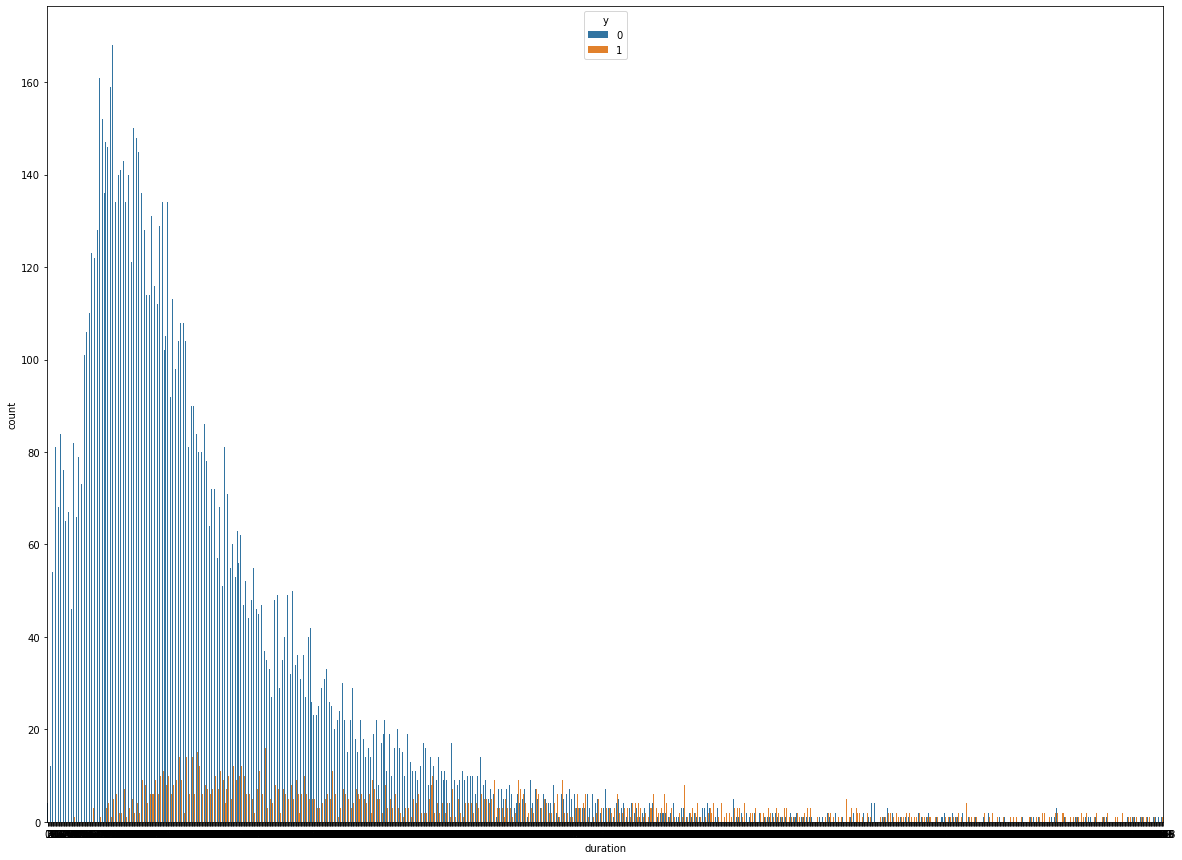

In [7]:
plt.figure(figsize=(20,15))
sns.countplot(x="duration",hue="y",data=dftrain)

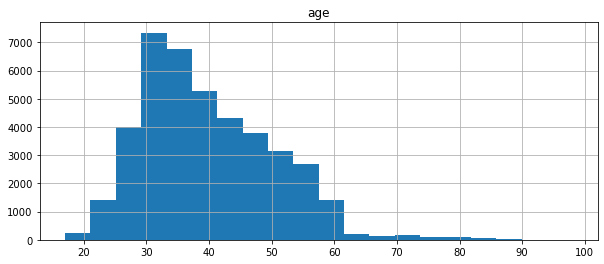

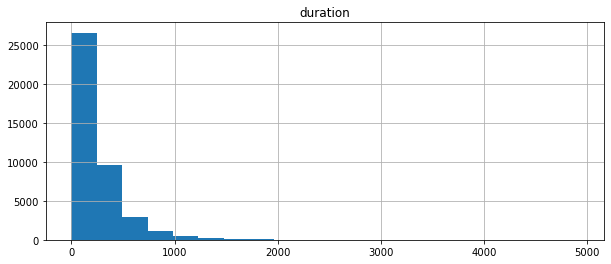

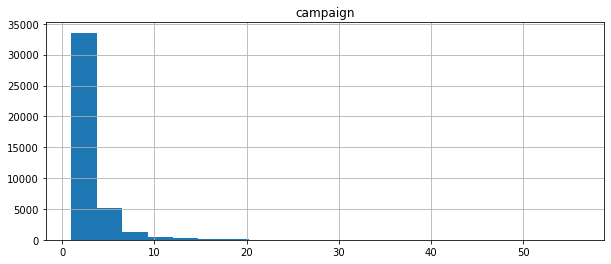

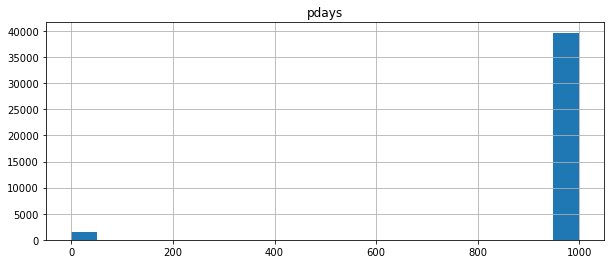

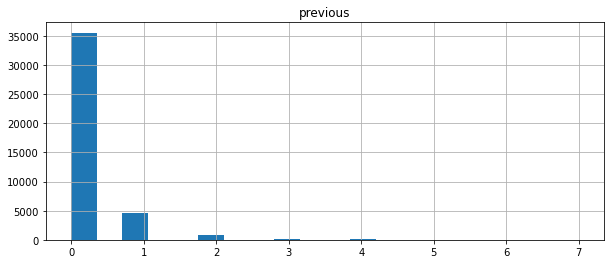

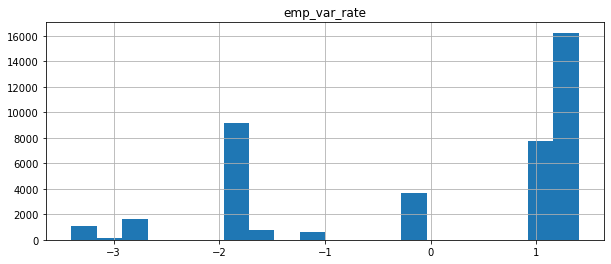

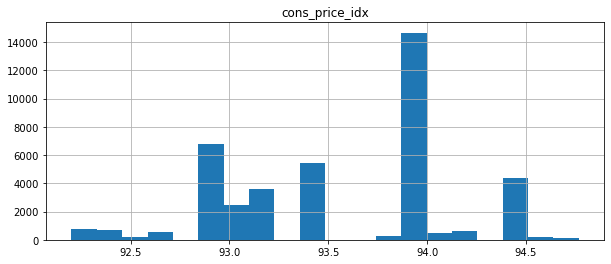

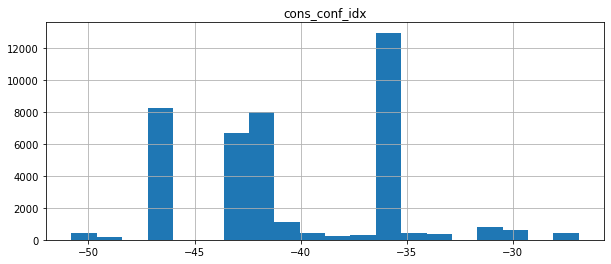

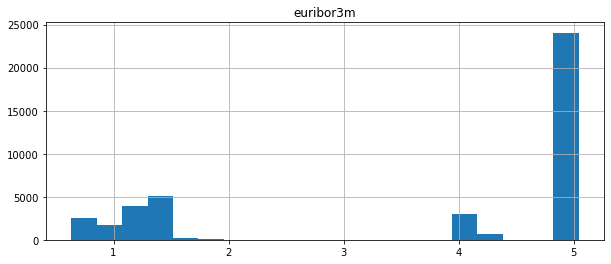

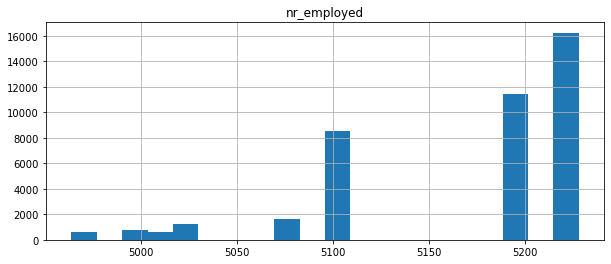

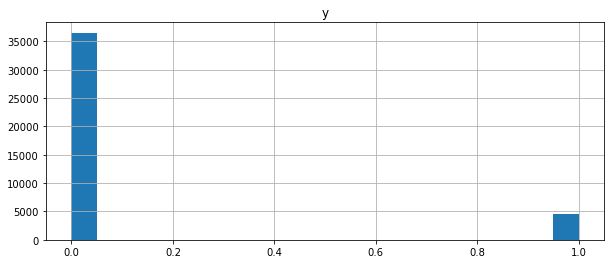

In [8]:
from pandas.api.types import is_numeric_dtype
for col in dftrain.columns:
    if  is_numeric_dtype(dftrain[col])==True:
        dftrain.hist(column=col,bins=20,figsize=(10,4))
        plt.show()

## 3. Preprocessing data


Check for missing values

In [9]:
for c in dftrain.columns:
    miss = dftrain[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

age has NO missing value!
job has NO missing value!
marital has NO missing value!
education has NO missing value!
default has NO missing value!
housing has NO missing value!
loan has NO missing value!
contact has NO missing value!
month has NO missing value!
day_of_week has NO missing value!
duration has NO missing value!
campaign has NO missing value!
pdays has NO missing value!
previous has NO missing value!
poutcome has NO missing value!
emp_var_rate has NO missing value!
cons_price_idx has NO missing value!
cons_conf_idx has NO missing value!
euribor3m has NO missing value!
nr_employed has NO missing value!
y has NO missing value!


In [10]:
for c in dftest.columns:
    miss = dftest[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has NO missing value!".format(c))

age has NO missing value!
job has NO missing value!
marital has NO missing value!
education has NO missing value!
default has NO missing value!
housing has NO missing value!
loan has NO missing value!
contact has NO missing value!
month has NO missing value!
day_of_week has NO missing value!
duration has NO missing value!
campaign has NO missing value!
pdays has NO missing value!
previous has NO missing value!
poutcome has NO missing value!
emp_var_rate has NO missing value!
cons_price_idx has NO missing value!
cons_conf_idx has NO missing value!
euribor3m has NO missing value!
nr_employed has NO missing value!


In [3]:
dftrain_clear = dftrain.drop(["contact","month","day_of_week"], axis=1,)
dftest_clear = dftest.drop(["contact","month","day_of_week"], axis=1)

In [4]:
#label encoder-----------------------------------------------------(no generar mas columnas)'job','marital','education','default','housing','loan','campaign','previous','poutcome'
label_encoder = preprocessing.LabelEncoder()
#train dataset
cols = ['job','marital','education','default','housing','loan','campaign','previous','poutcome']
dftrain_clear[cols] = dftrain[cols].apply(LabelEncoder().fit_transform)

#test dataset
dftest_clear[cols] = dftest[cols].apply(LabelEncoder().fit_transform)
dftest_clear

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,30,1,1,2,0,2,0,487,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
1,39,7,2,3,0,0,0,346,3,999,0,1,1.1,93.994,-36.4,4.855,5191.0
2,25,7,1,3,0,2,0,227,0,999,0,1,1.4,94.465,-41.8,4.962,5228.1
3,38,7,1,2,0,1,1,17,2,999,0,1,1.4,94.465,-41.8,4.959,5228.1
4,47,0,1,6,0,2,0,58,0,999,0,1,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,53,0,999,0,1,1.4,93.918,-42.7,4.958,5228.1
4115,39,0,1,3,0,2,0,219,0,999,0,1,1.4,93.918,-42.7,4.959,5228.1
4116,27,8,2,3,0,0,0,64,1,999,1,0,-1.8,92.893,-46.2,1.354,5099.1
4117,58,0,1,3,0,0,0,528,0,999,0,1,1.4,93.444,-36.1,4.966,5228.1


<AxesSubplot:>

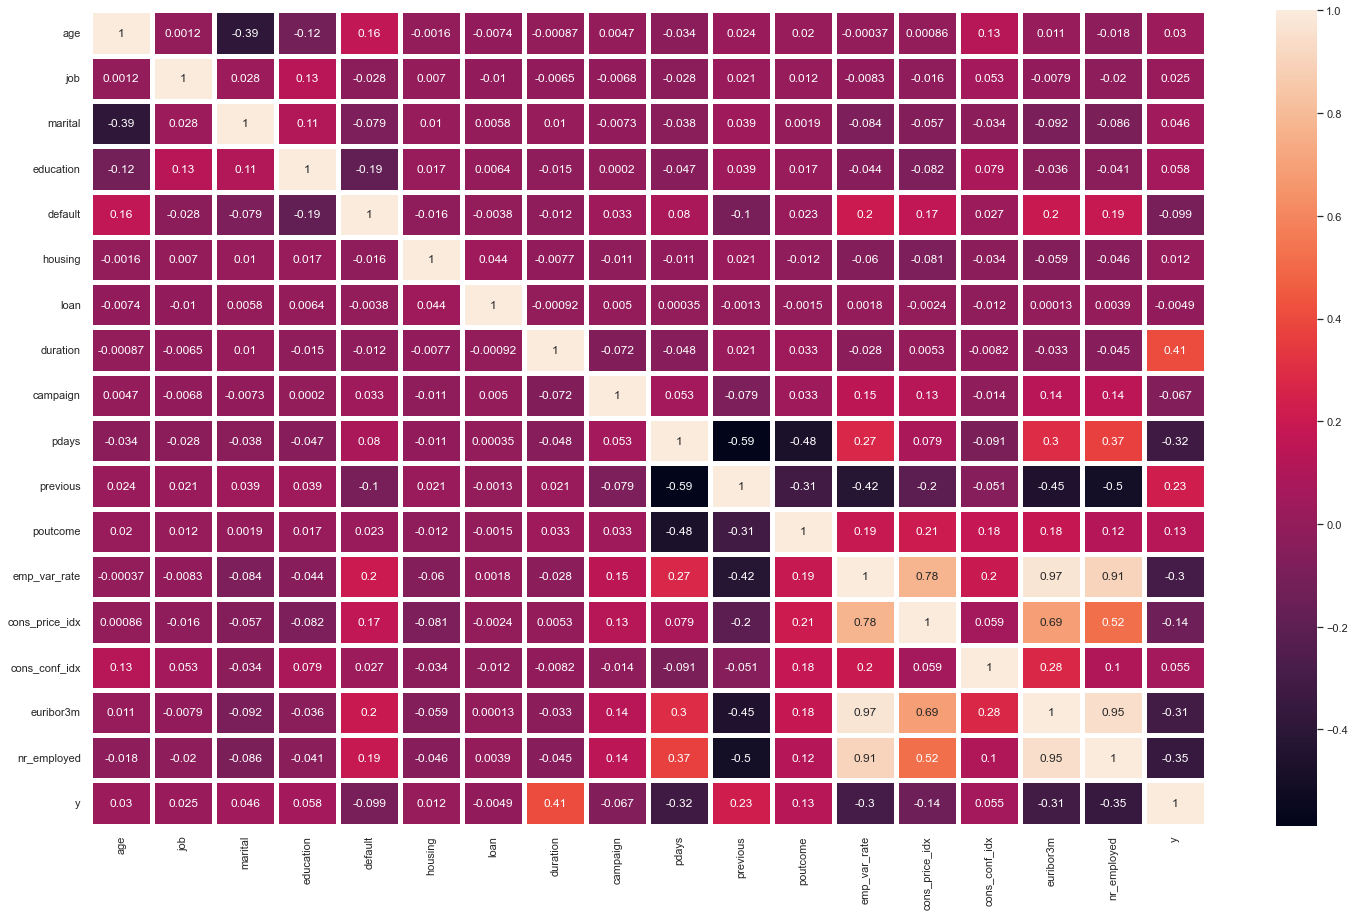

In [5]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(dftrain_clear.corr(),annot=True,linewidths=5)

## 4. Creación del modelo y división del dataset

In [6]:
X = dftrain_clear.iloc[:, :-1]
y = dftrain_clear["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

KNeighbors

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
k_range = list(range(1, 41))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [30]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 32}
Accuracy for our training dataset with tuning is : 91.21%


Logistic-Regresion

In [76]:
mRL = LogisticRegression(penalty='l2',solver='newton-cg')

SVM

In [11]:
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])

## 5. Entrenamiento

KNeighbors

In [46]:
n_neighbors = 32

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNtrainscore = knn.score(X_train, y_train)
KNtestscore = knn.score(X_test, y_test)

Logistic-Regresion

In [77]:
mRL.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

LogisticRegression(solver='newton-cg')

SVM

In [12]:
svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=5))])

## 6. Análisis de resultados

KNeighbors

In [48]:
print("Accuracy of K-NN classifier on training set: " + str(KNtrainscore))
print("Accuracy of K-NN classifier on test set: " + str(KNtestscore))

Accuracy of K-NN classifier on training set: 0.9154382435572821
Accuracy of K-NN classifier on test set: 0.9121145909201263


Logistic-Regresion

In [78]:
mRL.intercept_

array([-14.53188284])

In [79]:
mRL.coef_

array([[ 0.00763676,  0.0081895 ,  0.11094786,  0.06634387, -0.44661061,
        -0.00116691, -0.04961786,  0.00454833, -0.03449346, -0.0011253 ,
        -0.03622268,  0.4191043 , -0.52098602,  0.48734486,  0.02503749,
         0.02544806, -0.00660967]])

In [13]:
mRL.score(X_test, y_test)

NameError: name 'mRL' is not defined

SVM

In [14]:
print(svm.score(X_test, y_test))

0.8830622319333171


## 7. Realización de predicciones

KNeighbors

In [47]:
pred = knn.predict(X_test)

Logistic-Regresion

In [81]:
prob_threshold = 0.5
prob_df=pd.DataFrame(mRL.predict_proba(X_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.993995,0.006005,0
1,0.988428,0.011572,0
2,0.982860,0.017140,0
3,0.979560,0.020440,0
4,0.714731,0.285269,0
5,0.961138,0.038862,0
6,0.989385,0.010615,0
7,0.082202,0.917798,1
8,0.904242,0.095758,0
9,0.993790,0.006210,0


In [82]:
y_test[:10]

36491    0
8233     0
34329    0
15727    0
12035    0
19896    0
17439    0
977      1
11936    0
32657    0
Name: y, dtype: int64

SVM

## 8. Visualización

KNeighbors

In [49]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[10617   363]
 [  723   654]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10980
           1       0.64      0.47      0.55      1377

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.91     12357



In [69]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Xv = dftrain_clear.iloc[:, :-1].values
yv = dftrain_clear["y"].values

h = 0.02  # step size in the mesh

cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

clf = KNeighborsClassifier(n_neighbors)
clf.fit(Xv, yv)

x_min, x_max = Xv[:, 0].min() - 1, Xv[:, 0].max() + 1
y_min, y_max = Xv[:, 1].min() - 1, Xv[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(30, 20))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xv[:, 0], Xv[:, 1], c=yv, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 2 while Y.shape[1] == 17

Logistic-Regresion

In [83]:
print(classification_report(y_test, mRL.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10975
           1       0.68      0.40      0.50      1382

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



SVM